In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import skimage

In [57]:
I = np.array([[10,10,0,30,10],]*3)
I

array([[10, 10,  0, 30, 10],
       [10, 10,  0, 30, 10],
       [10, 10,  0, 30, 10]])

In [65]:
K = np.ones((3,3))*(1/9)
K

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [4]:
from scipy.signal import correlate2d

In [5]:
corr = correlate2d(I,K,mode="valid")

In [6]:
corr

array([[ 6.66666667, 13.33333333, 13.33333333]])

In [7]:
I_pad = np.pad(I,(2,2),'constant')

In [8]:
I_pad.shape

(7, 9)

In [9]:
corr_Ipad = correlate2d(I_pad,K,mode="valid")
corr_Ipad.shape

(5, 7)

In [10]:
corr2 = correlate2d(I,K,mode="full",boundary="fill",fillvalue=0)

In [11]:
corr2

array([[ 1.11111111,  2.22222222,  2.22222222,  4.44444444,  4.44444444,
         4.44444444,  1.11111111],
       [ 2.22222222,  4.44444444,  4.44444444,  8.88888889,  8.88888889,
         8.88888889,  2.22222222],
       [ 3.33333333,  6.66666667,  6.66666667, 13.33333333, 13.33333333,
        13.33333333,  3.33333333],
       [ 2.22222222,  4.44444444,  4.44444444,  8.88888889,  8.88888889,
         8.88888889,  2.22222222],
       [ 1.11111111,  2.22222222,  2.22222222,  4.44444444,  4.44444444,
         4.44444444,  1.11111111]])

In [12]:
corr_Ipad

array([[ 1.11111111,  2.22222222,  2.22222222,  4.44444444,  4.44444444,
         4.44444444,  1.11111111],
       [ 2.22222222,  4.44444444,  4.44444444,  8.88888889,  8.88888889,
         8.88888889,  2.22222222],
       [ 3.33333333,  6.66666667,  6.66666667, 13.33333333, 13.33333333,
        13.33333333,  3.33333333],
       [ 2.22222222,  4.44444444,  4.44444444,  8.88888889,  8.88888889,
         8.88888889,  2.22222222],
       [ 1.11111111,  2.22222222,  2.22222222,  4.44444444,  4.44444444,
         4.44444444,  1.11111111]])

In [13]:
from scipy.signal import convolve2d

In [14]:
conv = convolve2d(I,K,mode="valid")
conv

array([[ 6.66666667, 13.33333333, 13.33333333]])

In [15]:
H = np.array(([2,5,7],[1,3,9],[4,8,6]))
H

array([[2, 5, 7],
       [1, 3, 9],
       [4, 8, 6]])

In [16]:
corrH = correlate2d(I,H,mode="valid")
corrH

array([[230, 730, 700]])

In [17]:
convH = convolve2d(I,H,mode="valid")
convH

array([[380, 430, 550]])

In [18]:
Hflip = np.fliplr(H)
Hflip = np.flipud(Hflip)
Hflip

array([[6, 8, 4],
       [9, 3, 1],
       [7, 5, 2]])

In [19]:
corrHflip = correlate2d(I,Hflip,mode="valid")
corrHflip

array([[380, 430, 550]])

# Flipping H left to right and then bottom to up produces same result as convolving

In [20]:
Kbox = np.ones([5,5])*(1/(5*5))
Kbox

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [21]:
Kgaus = np.array([[1,4,7,4,1],[4,16,26,16,4],[7,26,41,26,7],[4,16,26,16,4],[1,4,7,4,1]]) * (1/273)

In [22]:
Kgaus 

array([[0.003663  , 0.01465201, 0.02564103, 0.01465201, 0.003663  ],
       [0.01465201, 0.05860806, 0.0952381 , 0.05860806, 0.01465201],
       [0.02564103, 0.0952381 , 0.15018315, 0.0952381 , 0.02564103],
       [0.01465201, 0.05860806, 0.0952381 , 0.05860806, 0.01465201],
       [0.003663  , 0.01465201, 0.02564103, 0.01465201, 0.003663  ]])

In [23]:
im = imageio.imread("woman.png")

In [24]:
conv_img_Kbox = convolve2d(im,Kbox,mode="valid")
conv_img_Kbox

array([[22.84, 20.  , 18.52, ..., 12.32, 12.2 , 12.08],
       [22.56, 19.8 , 17.84, ..., 12.04, 12.08, 11.96],
       [22.44, 19.76, 17.2 , ..., 11.76, 11.92, 11.92],
       ...,
       [26.  , 24.  , 22.36, ..., 30.4 , 29.92, 30.56],
       [26.  , 24.  , 22.2 , ..., 30.4 , 30.2 , 31.04],
       [26.  , 24.  , 22.2 , ..., 31.2 , 30.96, 31.92]])

In [25]:
conv_img_Kgaus = convolve2d(im,Kgaus,mode="valid")

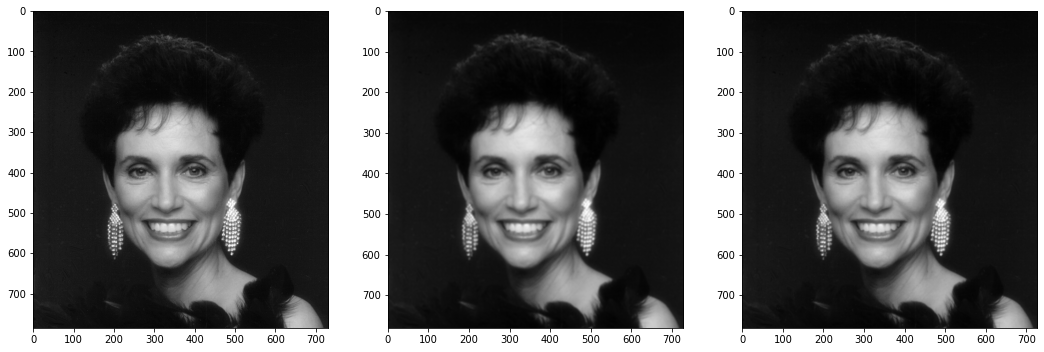

In [26]:
f = plt.figure(figsize=(18,15))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.imshow(im, cmap='gray')
ax2.imshow(conv_img_Kbox, cmap='gray')
ax3.imshow(conv_img_Kgaus, cmap='gray')
plt.show()

In [27]:
inverse_corr = correlate2d(K,I,mode="valid")
inverse_corr

array([[13.33333333, 13.33333333,  6.66666667]])

In [28]:
print(corr.shape)
print(inverse_corr.shape)

(1, 3)
(1, 3)


In [29]:
K

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [30]:
I

array([[10, 10,  0, 30, 10],
       [10, 10,  0, 30, 10],
       [10, 10,  0, 30, 10]])

In [31]:
Kpad = np.pad(K,(2,2),'constant')
Kpad

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.11111111, 0.11111111, 0.11111111,
        0.        , 0.        ],
       [0.        , 0.        , 0.11111111, 0.11111111, 0.11111111,
        0.        , 0.        ],
       [0.        , 0.        , 0.11111111, 0.11111111, 0.11111111,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [32]:
Kpad.shape

(7, 7)

In [33]:
inv_corr = correlate2d(Kpad,I,mode="valid")

In [34]:
inv_corr

array([[ 4.44444444,  4.44444444,  2.22222222],
       [ 8.88888889,  8.88888889,  4.44444444],
       [13.33333333, 13.33333333,  6.66666667],
       [ 8.88888889,  8.88888889,  4.44444444],
       [ 4.44444444,  4.44444444,  2.22222222]])

In [35]:
inv_corr2 = correlate2d(I,Kpad,mode="full")
inv_corr2

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  1.11111111,  2.22222222,  2.22222222,
         4.44444444,  4.44444444,  4.44444444,  1.11111111,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  2.22222222,  4.44444444,  4.44444444,
         8.88888889,  8.88888889,  8.88888889,  2.22222222,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  3.33333333,  6.66666667,  6.66666667,
        13.33333333, 13.33333333, 13.33333333,  3.33333333,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  2.22222222,  4.44444444,  4.44444444,
         8.88888889,  8.88888889,  8.88888889,  2.22222222,  0.        ,
         0.   

In [36]:
inv_corr2 = correlate2d(Kpad,I,mode="full")
inv_corr2

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  1.11111111,  4.44444444,  4.44444444,
         4.44444444,  2.22222222,  2.22222222,  1.11111111,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  2.22222222,  8.88888889,  8.88888889,
         8.88888889,  4.44444444,  4.44444444,  2.22222222,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  3.33333333, 13.33333333, 13.33333333,
        13.33333333,  6.66666667,  6.66666667,  3.33333333,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  2.22222222,  8.88888889,  8.88888889,
         8.88888889,  4.44444444,  4.44444444,  2.22222222,  0.        ,
         0.   

In [37]:
Im = np.array([[10,10,0,30,10],]*5)

In [38]:
Im

array([[10, 10,  0, 30, 10],
       [10, 10,  0, 30, 10],
       [10, 10,  0, 30, 10],
       [10, 10,  0, 30, 10],
       [10, 10,  0, 30, 10]])

In [39]:
filt = np.ones([3,3])*(1/9)

In [40]:
corr_Im_f = correlate2d(Im,filt,mode="valid")
corr_Im_f

array([[ 6.66666667, 13.33333333, 13.33333333],
       [ 6.66666667, 13.33333333, 13.33333333],
       [ 6.66666667, 13.33333333, 13.33333333]])

In [41]:
Impad = np.pad(Im,(2,2),'constant')

In [42]:
corr_f_im = correlate2d(Impad,filt,mode="valid")
corr_f_im.shape

(7, 7)

In [43]:
Im

array([[10, 10,  0, 30, 10],
       [10, 10,  0, 30, 10],
       [10, 10,  0, 30, 10],
       [10, 10,  0, 30, 10],
       [10, 10,  0, 30, 10]])

In [44]:
conv1 = convolve2d(I,filt,mode="valid")
conv1

array([[ 6.66666667, 13.33333333, 13.33333333]])

In [45]:
alpha = 3

In [46]:
conv1*alpha

array([[20., 40., 40.]])

In [47]:
Alphafilt = alpha*filt
Alphafilt

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

In [48]:
conv2 = convolve2d(I,Alphafilt,mode="valid")
conv2

array([[20., 40., 40.]])

In [49]:
I2 = np.array([[5,2,7,3,9],]*3)

In [50]:
convb1 = convolve2d((I+I2),filt,mode="valid")
convb1

array([[11.33333333, 17.33333333, 19.66666667]])

In [51]:
convb21 = convolve2d(I,filt,mode="valid")
convb21

array([[ 6.66666667, 13.33333333, 13.33333333]])

In [52]:
convb22 = convolve2d(I2,filt,mode="valid")
convb22

array([[4.66666667, 4.        , 6.33333333]])

In [53]:
convb21 + convb22

array([[11.33333333, 17.33333333, 19.66666667]])